<a href="https://colab.research.google.com/github/KOMALA102/NMphase2/blob/main/Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 - 13s - 32ms/step - accuracy: 0.8448 - loss: 0.5156 - val_accuracy: 0.9557 - val_loss: 0.1558
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.9296 - loss: 0.2360 - val_accuracy: 0.9663 - val_loss: 0.1152
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.9452 - loss: 0.1843 - val_accuracy: 0.9728 - val_loss: 0.0923
Epoch 4/10
422/422 - 4s - 10ms/step - accuracy: 0.9541 - loss: 0.1509 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9584 - loss: 0.1345 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9641 - loss: 0.1209 - val_accuracy: 0.9780 - val_loss: 0.0743
Epoch 7/10
422/422 - 3s - 8ms/step - accuracy: 0.9661 - loss: 0.1084 - val_accuracy: 0.9783 - val_loss: 0.0723
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9693 - loss: 0.0996 - val_accuracy: 0.9773 - val_loss: 0.0712
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9711 - loss: 0.0951 - val_accuracy: 0.9790 - val_loss: 0.069

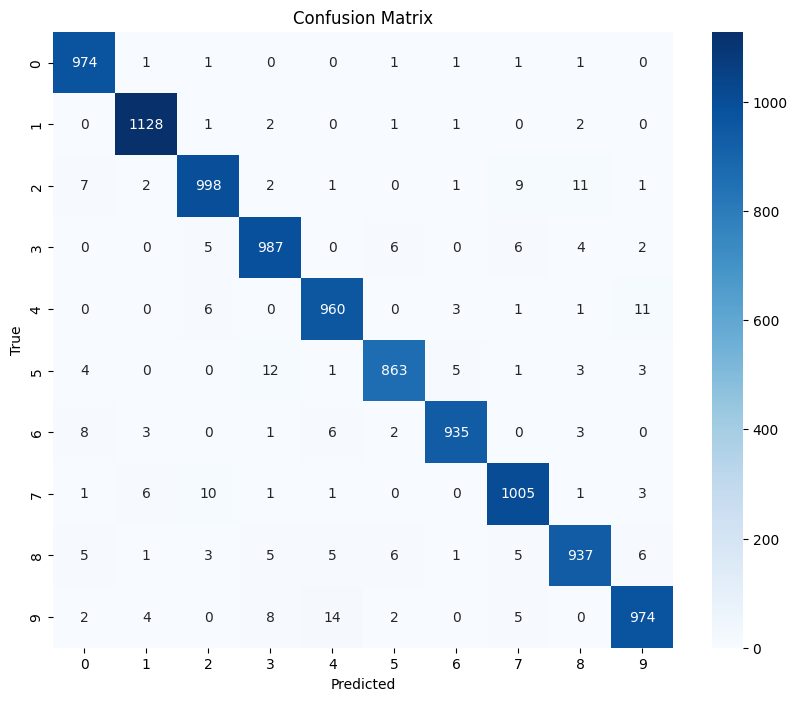


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



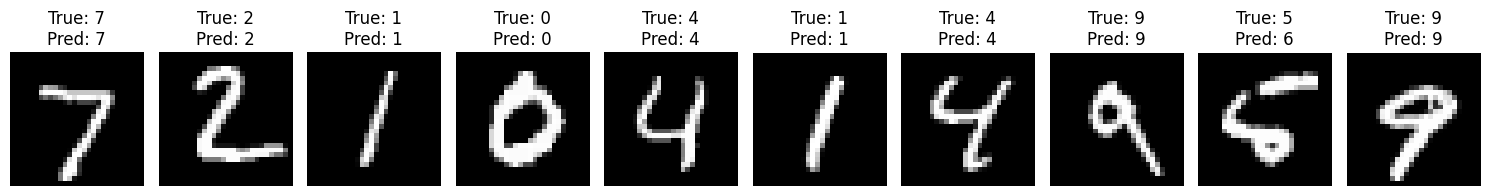

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Build a deep neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_categorical,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Predict test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# Visualize some predictions
num_images = 10
plt.figure(figsize=(15, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()